# 1. EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Personal data are removed, province names are also encoded to protect patients privacy.

In [2]:
hbp = pd.read_csv("../data/high_blood_pressure_VN_2020.csv")
hbp.info()
hbp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survey_time                 18536 non-null  object 
 1   survey_year                 20768 non-null  float64
 2   birth_year                  20555 non-null  object 
 3   gender                      20770 non-null  int64  
 4   body_height                 19808 non-null  float64
 5   body_weight                 19860 non-null  float64
 6   smoker                      19993 non-null  float64
 7   high_blood_pressure         20770 non-null  int64  
 8   under_treatment             19953 non-null  float64
 9   lipid                       19448 non-null  float64
 10  diabetes                    19681 non-null  float64
 11  systolic_blood_pressure_1   20737 non-null  float64
 12  diastolic_blood_pressure_1  20739 non-null  float64
 13  heart_rate_1                206

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
0,19/2/2020,2020.0,1963,1,NaN,NaN,1.0,0,NaN,NaN,NaN,130.0,70.0,78.0,120.0,80.0,78.0,0
1,01/01/2020,2020.0,1949,1,160.0,50.0,0.0,0,0.0,0.0,0.0,124.0,70.0,68.0,120.0,70.0,72.0,0
2,12/12/2018,2018.0,2001,1,165.0,52.0,0.0,0,0.0,0.0,0.0,100.0,60.0,90.0,110.0,70.0,90.0,0
3,01/01/2020,2020.0,1960,1,160.0,63.0,0.0,1,1.0,0.0,0.0,130.0,79.0,87.0,123.0,74.0,87.0,0
4,01/01/2020,2020.0,1950,1,164.0,61.0,0.0,0,0.0,0.0,0.0,118.0,86.0,73.0,110.0,60.0,80.0,0


In [32]:
hbp.isna().sum().sort_values(ascending=False)

survey_time                   2234
heart_rate_2                  2218
lipid                         1322
diabetes                      1089
systolic_blood_pressure_2     1017
diastolic_blood_pressure_2    1017
body_height                    962
body_weight                    910
under_treatment                817
smoker                         777
age                            217
birth_year                     215
heart_rate_1                   157
systolic_blood_pressure_1       33
diastolic_blood_pressure_1      31
survey_year                      2
gender                           0
high_blood_pressure              0
province_enc                     0
dtype: int64

## 1.1. Fix birth_year and Calculate Age

In [ ]:
#survey time doesn't have the correct dtype, but we won't use this column
#we will only need the survey_year and the birth_year to calculate the age

In [9]:
#birth_year should be 4 digits
hbp["birth_year"].str.len().value_counts()

4.0     20553
10.0        2
Name: birth_year, dtype: int64

In [11]:
#those with 10 digits include month, date
hbp[hbp["birth_year"].str.len()==10]

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
5010,04/12/2019,2019.0,04/29/1905,1,160.0,56.0,1.0,1,1.0,0.0,0.0,141.0,81.0,87.0,136.0,80.0,89.0,6
8256,09/12/2019,2019.0,04/19/1905,2,150.0,42.0,0.0,0,0.0,3.0,1.0,138.0,94.0,89.0,130.0,80.0,87.0,6


In [12]:
#use year only
hbp["birth_year"].replace('04/29/1905', '1905', inplace = True)
hbp["birth_year"].replace('04/19/1905', '1905', inplace = True)

In [13]:
#double check
hbp["birth_year"].str.len().value_counts()

4.0    20555
Name: birth_year, dtype: int64

In [17]:
#convert to float, can't use int because there are NaN
hbp["birth_year"] = hbp["birth_year"].astype(float)

In [21]:
#calculate age
hbp["age"] = hbp["survey_year"] - hbp["birth_year"]

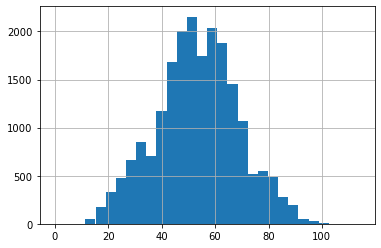

In [29]:
#age distribution
#near normal distribution, avg. age is ~55
hbp["age"].hist(bins = 30);

## 2.2. Gender

In [33]:
hbp["gender"].value_counts()
#from original data 1 is male, 2 is female
#might need to change to 0 and 1 later

2    12375
1     8395
Name: gender, dtype: int64